In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Random Data

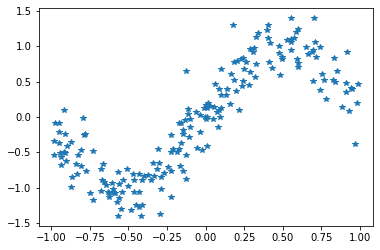

In [2]:
np.random.seed(2)
X = 2*np.random.rand(1,200) - 1
Y = np.sin(3*X) + 0.25 * np.random.randn(1,200)

plt.plot(X.T,Y.T,'*')

In [3]:
X.shape[0]

1

OLS with gradient descent

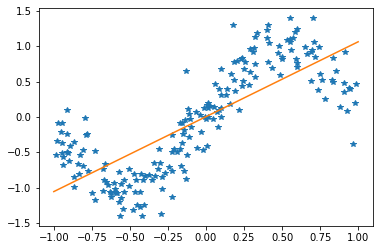

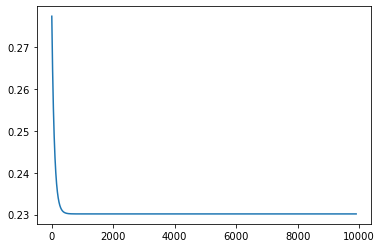

In [4]:
np.random.seed(3)
W = np.random.randn(1,X.shape[0])
b = np.zeros((1,1))

alpha = 0.01

history = []

for step in range(10000):
    
    Z = np.dot(W,X) + b
    
    # chain rule
    dZ = (2 / X.shape[1]) * (Z - Y)
    dW = np.dot(dZ,X.T)
    db = np.sum(dZ,axis=1,keepdims=True)
    
    W -= alpha * dW
    b -= alpha * db
    
    history.append(np.mean((Z-Y)**2))
    
X_grid = np.linspace(-1,1,20).reshape(1,20)
Y_grid = np.dot(W,X_grid) + b

plt.plot(X.T,Y.T,'*')
plt.plot(X_grid.T,Y_grid.T)

plt.figure()
plt.plot(history[100:])

Neural network with ReLU activation function, one hidden layer with 20 neurons

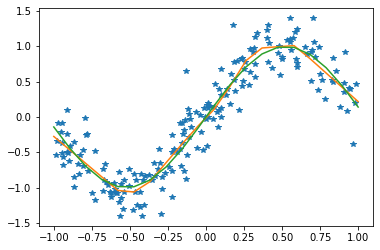

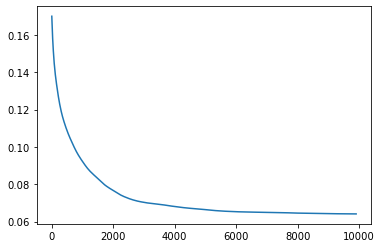

In [5]:
n1 = 20

np.random.seed(5)
W1 = np.random.randn(n1,X.shape[0])
b1 = np.zeros((n1,1))

W2 = np.random.randn(1,n1)
b2 = np.zeros((1,1))

alpha = 0.01

history = []

for step in range(10000):
    
    Z1 = np.dot(W1,X) + b1
    H1 = Z1 * (Z1>0)
    Z2 = np.dot(W2,H1) + b2
    
    # chain rule
    dZ2 = (2 / X.shape[1]) * (Z2 - Y)
    dW2 = np.dot(dZ2,H1.T)
    db2 = np.sum(dZ2,axis=1,keepdims=True)
    
    dH1 = np.dot(W2.T,dZ2)
    
    dZ1 = dH1 * (H1>0)
    dW1 = np.dot(dZ1,X.T)
    db1 = np.sum(dZ1,axis=1,keepdims=True)
    
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    
    history.append(np.mean((Z2-Y)**2))
    
X_grid = np.linspace(-1,1,20).reshape(1,20)
Z1 = np.dot(W1,X_grid) + b1
H1 = Z1 * (Z1>0)
Z2_grid = np.dot(W2,H1) + b2

plt.plot(X.T,Y.T,'*')
plt.plot(X_grid.T,Z2_grid.T)
plt.plot(X_grid.T,np.sin(3*X_grid.T))
plt.figure()
plt.plot(history[100:])

Random data with 2 features

(2, 625)


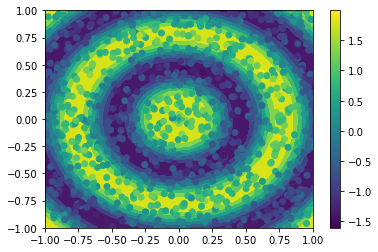

In [6]:
np.random.seed(4)
X = 2*np.random.rand(2,1000) - 1
Y = np.sin(10*np.linalg.norm(X,axis=0,keepdims=True)) + 0.25 * np.random.randn(1,1000)

X0,X1 = np.meshgrid(np.linspace(-1,1,25),np.linspace(-1,1,25))
X_grid = np.vstack([X0.ravel(),X1.ravel()])
print(X_grid.shape)
Y_sin = np.sin(10*np.linalg.norm(X_grid,axis=0,keepdims=True)) 

plt.contourf(X0,X1,Y_sin.reshape(X0.shape))
plt.scatter(X[0],X[1],c=Y)
plt.colorbar()

Neural network with 2 features, ReLU activation function, one hidden layer with 20 neurons

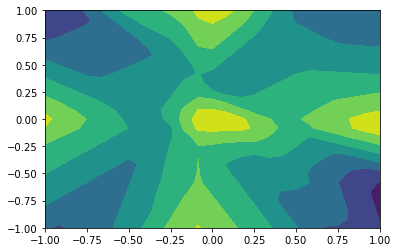

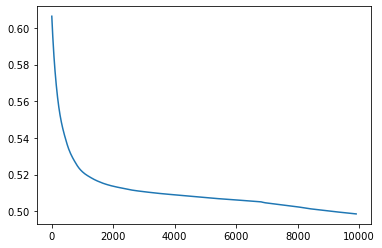

In [7]:
n1 = 20

np.random.seed(5)
W1 = np.random.randn(n1,X.shape[0])
b1 = np.zeros((n1,1))

W2 = np.random.randn(1,n1)
b2 = np.zeros((1,1))

alpha = 0.01

history = []

for step in range(10000):
    
    Z1 = np.dot(W1,X) + b1
    H1 = Z1 * (Z1>0)
    Z2 = np.dot(W2,H1) + b2
    
    # chain rule
    dZ2 = (2 / X.shape[1]) * (Z2 - Y)
    dW2 = np.dot(dZ2,H1.T)
    db2 = np.sum(dZ2,axis=1,keepdims=True)
    
    dH1 = np.dot(W2.T,dZ2)
    
    dZ1 = dH1 * (H1>0)
    dW1 = np.dot(dZ1,X.T)
    db1 = np.sum(dZ1,axis=1,keepdims=True)
    
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    
    history.append(np.mean((Z2-Y)**2))
    
Z1 = np.dot(W1,X_grid) + b1
H1 = Z1 * (Z1>0)
Z2_grid = np.dot(W2,H1) + b2

plt.contourf(X0,X1,Z2_grid.reshape(X0.shape))
    
plt.figure()
plt.plot(history[100:])

Neural network with two features, ReLU activation function, two hidden layer with 20 neurons **AND REGULARIZATION (RIDGE)**<br>
<br>
LASSO REG: $L_1 = \sum_{j=1}^p |w_j|$<br>
<br>
RIDGE REG: $L_2 = \sum_{j=1}^p w_j^2$<br>

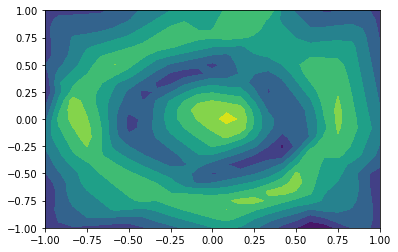

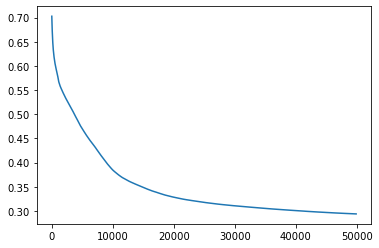

In [10]:
# hyperparameters
n = [10,10]
alpha = 0.01
lam = 0.001

np.random.seed(5)
W1 = np.random.randn(n[0],X.shape[0])
b1 = np.zeros((n[0],1))

W2 = np.random.randn(n[1],n[0])
b2 = np.zeros((n[1],1))

W3 = np.random.randn(1,n[1])
b3 = np.zeros((1,1))

history = []

for step in range(50000):
    
    Z1 = np.dot(W1,X) + b1
    H1 = Z1 * (Z1>0)
    Z2 = np.dot(W2,H1) + b2
    H2 = Z2 * (Z2 > 0)
    Z3 = np.dot(W3,H2) + b3
    
    # chain rule
    dZ3 = (2 / X.shape[1]) * (Z3 - Y)
    dW3 = np.dot(dZ3,H2.T) + lam * 2 * W3 # L2 regularization
    db3 = np.sum(dZ3,axis=1,keepdims=True)
    
    dH2 = np.dot(W3.T,dZ3)
    
    dZ2 = dH2 * (H2>0)
    dW2 = np.dot(dZ2,H1.T) + lam * 2 * W2
    db2 = np.sum(dZ2,axis=1,keepdims=True)
    
    dH1 = np.dot(W2.T,dZ2)
    
    dZ1 = dH1 * (H1>0)
    dW1 = np.dot(dZ1,X.T) + lam * 2 * W1
    db1 = np.sum(dZ1,axis=1,keepdims=True)
    
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    
    mse = np.mean((Z3-Y)**2)
    penalty = np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2)
    history.append(mse + lam * penalty)
    
Z1 = np.dot(W1,X_grid) + b1
H1 = Z1 * (Z1>0)
Z2 = np.dot(W2,H1) + b2
H2 = Z2 * (Z2 > 0)
Z3_grid = np.dot(W3,H2) + b3

plt.contourf(X0,X1,Z3_grid.reshape(X0.shape))
    
plt.figure()
plt.plot(history[100:])